In [1]:
!nvidia-smi

Thu Jun 26 16:32:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use the GroundingDino SAM model to efficiently create the mask for the Saree

In [3]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [4]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Total 463 (delta 0), reused 0 (delta 0), pack-reused 463 (from 1)
Receiving objects: 100% (463/463), 12.91 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (220/220), done.


In [5]:
%cd /content/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn
!sed -i 's/value.type()/value.scalar_type()/g' ms_deform_attn_cuda.cu
!sed -i 's/value.scalar_type().is_cuda()/value.is_cuda()/g' ms_deform_attn_cuda.cu

/content/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn


In [6]:
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 

In [7]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-f7hftn2p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-f7hftn2p
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=bfebb8ae0c2a3cfcda079a6222c6b455e55bcb0365d6024ef5c6bf54bf9d24be
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnmofqbs/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [8]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [9]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.


In [10]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth


import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content
/content/weights
/content/weights/groundingdino_swint_ogc.pth ; exist: True
/content
/content/weights


In [11]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

import torch

DEVICE = 'cuda'

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [12]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)


/content/GroundingDINO


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [13]:
SAM_ENCODER_VERSION = "vit_h"

from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [14]:
# Importing required packages
from typing import List
import cv2
import supervision as sv
import numpy as np
from segment_anything import SamPredictor

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

In [15]:
# Create a pipeline to extract the inverted binary mask
def get_saree_inverted_binary_mask(saree_image_path):
  saree_path = saree_image_path
  CLASSES = ["saree"]
  BOX_TRESHOLD = 0.40
  TEXT_TRESHOLD = 0.25

  # load image
  saree_image = cv2.imread(saree_path)

  # detect objects
  detections = grounding_dino_model.predict_with_classes(image = saree_image,
                                                         classes = enhance_class_name(class_names=CLASSES),
                                                         box_threshold = BOX_TRESHOLD,
                                                         text_threshold = TEXT_TRESHOLD)

  # print(detections)

  # annotate image with detections
  box_annotator = sv.BoxAnnotator()
  labels = [
      f"{CLASSES[class_id]} {confidence:0.2f}"
      for _, _, confidence, class_id, _
      in detections]
  annotated_frame = box_annotator.annotate(scene = saree_image.copy(), detections = detections, labels = labels)

  # convert detections to masks
  detections.mask = segment(
      sam_predictor=sam_predictor,
      image = cv2.cvtColor(saree_image, cv2.COLOR_BGR2RGB),
      xyxy = detections.xyxy)

  # annotate image with detections
  box_annotator = sv.BoxAnnotator()
  mask_annotator = sv.MaskAnnotator()
  labels = [
      f"{CLASSES[class_id]} {confidence:0.2f}"
      for _, _, confidence, class_id, _
      in detections]
  annotated_image = mask_annotator.annotate(scene = saree_image.copy(), detections = detections)
  annotated_image = box_annotator.annotate(scene = annotated_image, detections = detections, labels = labels)

  ## Assuming detections.mask contains the segmentation masks
  masks = detections.mask  # Shape: (N, H, W) where N = number of detections

  binary_mask = (detections.mask[0] * 255).astype(np.uint8) # when there is only 1 masks

  inverted_mask = 255 - binary_mask

  return binary_mask, inverted_mask

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1614: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/content/GroundingDINO/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

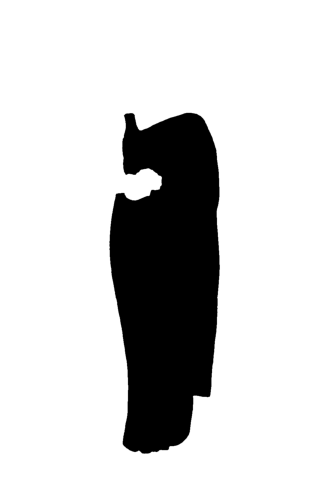

In [16]:
# Check the binary mask and the inverted binary mask here
binary_mask, inverted_mask = get_saree_inverted_binary_mask("/content/Source_Model.jpg")
sv.plot_image(inverted_mask, (6,6))

# Trying only Stable Diffusion 2 without controlnet

In [ ]:
# from diffusers import StableDiffusionInpaintPipeline
# import torch

# Stable Diffusion XL with controlnet inpainting

In [ ]:
# # Installing required packages
# !pip install transformers accelerate

In [ ]:
# # Importing required packages
# from diffusers import StableDiffusionXLControlNetInpaintPipeline, ControlNetModel, DDIMScheduler
# import numpy as np
# import torch

In [ ]:
# # Setting the generator object
# generator = torch.Generator(device="cuda").manual_seed(-1)

In [ ]:
# # Pre-processing the images
# saree_image = cv2.imread("/content/Source_Model.jpg")

# init_image = cv2.resize(saree_image,(1024,1024))

# mask_image = cv2.resize(inverted_mask,(1024,1024))

# ref_image = cv2.imread("/content/Control_Image.jpg")

# ref_image = cv2.resize(ref_image,(1024,1024))

# # Converting the image into RGB format
# init_image = cv2.cvtColor(init_image, cv2.COLOR_BGR2RGB)
# mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)
# ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB)

# # Converting the init_image, mask_image and ref_image in PIL format
# from PIL import Image

# init_image = Image.fromarray(init_image)
# mask_image = Image.fromarray(mask_image)
# ref_image = Image.fromarray(ref_image)

In [ ]:
# # Setting the controlnet and sd object
# controlnet = ControlNetModel.from_pretrained(
#     "destitech/controlnet-inpaint-dreamer-sdxl", torch_dtype=torch.float16)

# pipe = StableDiffusionXLControlNetInpaintPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-xl-base-1.0", controlnet = controlnet, torch_dtype = torch.float16)

# pipe.to("cuda")

In [ ]:
# # Setting the Scheduler
# pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

In [ ]:
# # To move ununsed spaces in cpu
# pipe.enable_model_cpu_offload()

In [ ]:
# # Setting the positive and negative prompt

# pos_prompt = """
# A realistic photo of a healthy, fat, obese woman, with oval face, hands and face are properly generated,
# around the saree, elegant look in the eye
# """

# neg_prompt = """
# bad quality, blurry, distorted face, extra limbs, extra fingers, low resolution, bad anatomy, unnatural
# lighting, deformed, missing hands, cropped, duplicate face, mismatched skin tone, unrealistic eyes, glitch,
# watermark, text, poorly drawn, skinny, slim, thin, athletic, smoothed saree, washed-out colors, simplified
# patterns, loss of detail
# """

In [ ]:
# # Generate image
# output = pipe(prompt = pos_prompt, negative_prompt = neg_prompt, num_inference_steps = 50,
#               generator = generator, image = init_image, mask_image = mask_image,
#               control_image = ref_image, strength = 0.1, guidance_scale = 9,
#               controlnet_conditioning_scale = 0.05, eta = 1.0, resize = True, mask_blur = 0,
#               control_guidance_start = 0.4, control_guidance_end = 0.5)

# # # Strength is 0.1
# # # Guidance_scale is 9 # How strictly it will follow my text prompt
# # # Controlnet_conditioning_scale is 0.05
# # # eta is 1.0
# # # Num_inference_steps is 50

# # Get the inpainted image
# inpainted_image = output.images[0]

# final_result = np.array(inpainted_image)

# # Convert the result in BGR image
# final_result = cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR)

# # Show the result using supervision library
# sv.plot_image(final_result, (6,6))

# The Stable Diffusion Inpainting Starts from here Version 3

##### Fix the cuda out of memory error:

import torch
torch.cuda.empty_cache()

In [ ]:
# from huggingface_hub import login
# from google.colab import userdata

# login(token = userdata.get('HF_TOKEN'))

In [ ]:
# # Importing Required Packages for Stable Diffusion 3 with ControlNet Pipeline

# import torch
# from diffusers.utils import load_image, check_min_version
# from diffusers.pipelines import StableDiffusion3ControlNetInpaintingPipeline
# from diffusers.models.controlnet_sd3 import SD3ControlNetModel

In [ ]:
# # For use when the error is: cuda is out of memory
# import torch
# torch.cuda.empty_cache()

In [ ]:
# # Setting the ControlNet
# controlnet = SD3ControlNetModel.from_pretrained(
#     "alimama-creative/SD3-Controlnet-Inpainting", use_safetensors = True, extra_conditioning_channels = 1,
#     torch_dtype = torch.float16)

In [ ]:
# import torch
# torch.cuda.empty_cache()

In [ ]:
# # Setting the Stable Diffusion 3 Pipeline with Medium Model
# pipe2 = StableDiffusion3ControlNetInpaintingPipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers",
#     controlnet = controlnet,
#     torch_dtype=torch.bfloat16) # Or torch.float16
# pipe2.enable_model_cpu_offload()

In [ ]:
# !nvidia-smi --query-compute-apps=pid,used_memory --format=csv,noheader,nounits

In [ ]:
# control_image_nparray = cv2.imread("/content/Healthy_Woman.jpg")

In [ ]:
# control_image_nparray = cv2.resize(control_image_nparray, (1000,1500))

In [ ]:
# # # Converting the saree_image and the inverted mask image into PIL format
# from PIL import Image

# saree_pil = Image.open("/content/Source_Model.jpg")
# inverted_mask_pil = Image.fromarray(inverted_mask)
# control_image_pil = Image.fromarray(control_image_nparray)

In [ ]:
# # Setting the pipeline attributes like image width, height

# width = 640 # Optimal is 1024
# height = 640 # Optimal is 1024
# prompt = "plus-size Indian woman, full-figured, curvy, mature, healthy body type, standing, \
# neutral background"
# generator = torch.Generator(device="cuda").manual_seed(24)

# neg_prompt = "deformed, distorted, disfigured, poorly drawn, bad anatomy, wrong anatomy, extra limb, \
# missing limb, floating limbs, mutated hands and fingers, disconnected limbs, mutation, mutated, ugly, disgusting, blurry, amputation, NSFW"

In [ ]:
# # Run the pipe2 pipeline
# res_image = pipe2(
#     negative_prompt = neg_prompt,
#     prompt = prompt,
#     height = height,
#     width = width,
#     control_image = control_image_pil,
#     control_mask = inverted_mask_pil,
#     num_inference_steps = 28,
#     generator=generator,
#     controlnet_conditioning_scale = 0.95,
#     guidance_scale = 7,
# ).images[0]

# Use Stable Diffusion Controlnet inpainting version 1.5

In [17]:
# # !pip install transformers accelerate
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, DDIMScheduler
import numpy as np
import torch

In [19]:
generator = torch.Generator(device="cuda").manual_seed(-1)

In [21]:
saree_image = cv2.imread("/content/Source_Model.jpg")

init_image = cv2.resize(saree_image,(512,512))

mask_image = cv2.resize(inverted_mask,(512,512))

ref_image = cv2.imread("/content/Control_Image.jpg")

ref_image = cv2.resize(ref_image,(512,512))

# Converting the image into RGB format
init_image = cv2.cvtColor(init_image, cv2.COLOR_BGR2RGB)
mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)
ref_image = cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB)

# Converting the init_image, mask_image and ref_image in PIL format
from PIL import Image

init_image = Image.fromarray(init_image)
mask_image = Image.fromarray(mask_image)
ref_image = Image.fromarray(ref_image)

In [22]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_inpaint", torch_dtype=torch.float16)

pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet = controlnet, torch_dtype = torch.float16)

pipe.to("cuda")

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionControlNetInpaintPipeline {
  "_class_name": "StableDiffusionControlNetInpaintPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [23]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

In [25]:
# Setting the positive and negative prompt
# a realistic, detailed high quality photo of a healthy young woman, fat build, obese, hands are
# properly shown, face is clearly visible with clear saree details


# a realistic photo of a healthy, fat, obese woman, with oval face, hands and face are properly
# generated, elegant look in the eye, keeping the saree details unchanged


pos_prompt = """
a beautiful, mature, plus-size, heavy, obese Indian woman, full-figured, curvy, mature, healthy
body type, standing, neutral background, hands are generated around her saree with a good looking face
"""

neg_prompt = """
blurry, distorted face, extra limbs, extra fingers, low resolution, bad anatomy, unnatural lighting,
deformed, missing hands, cropped, duplicate face, mismatched skin tone, unrealistic eyes,
glitch, watermark, text, poorly drawn, skinny, slim, thin, athletic"""

# deformed face, deformed hands, distorted face, poorly drawn face, ugly face, mutated hands,
# poorly drawn hands, bad anatomy, disfigured, blurry, low quality, blurry face,
# blurry hands, unrealistic, cartoon, drawing, painting

  0%|          | 0/37 [00:00<?, ?it/s]

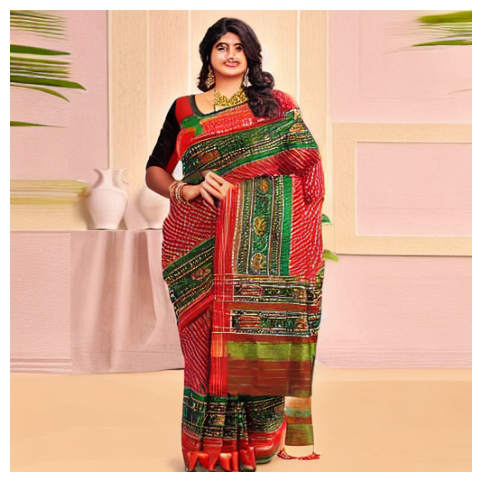

In [27]:
# generate image
output = pipe(prompt = pos_prompt, negative_prompt = neg_prompt, num_inference_steps = 50,
              generator = generator, image = init_image, mask_image = mask_image,
              control_image = ref_image, strength = 0.75, guidance_scale = 7.5,
              controlnet_conditioning_scale = 0.05, eta = 1.0)

# Strength is 0.1
# Guidance_scale is 9 # How strictly it will follow my text prompt
# Controlnet_conditioning_scale is 0.05
# eta is 1.0
# Num_inference_steps is 50

# Get the inpainted image
inpainted_image = output.images[0]

final_result = np.array(inpainted_image)

# Convert the result in BGR image
final_result = cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR)

# Show the result using supervision library
sv.plot_image(final_result, (6,6))

# Trying Stable-Diffusion Inpainting Using Runware API

In [ ]:
# # Importing required packages
# import base64
# import requests
# import json
# from PIL import Image
# from io import BytesIO
# from google.colab import userdata
# import io

In [ ]:
# def image_inpainting(positive_prompt,negative_prompt,seed_image, mask_image, width=1280, height=1536,  model="civitai:620368@860423", number_results=1):
#     url = "https://api.runware.ai/v1"
#     # Create the payload
#     payload = [
#         {
#             "taskType": "authentication",
#             "apiKey": userdata.get('runware')} ,
#         {
#             "taskType": "imageInference",
#             "taskUUID": "39d7207a-87ef-4c93-8082-1431f9c1dc97",
#             "positivePrompt": positive_prompt,
#             "negativePrompt": negative_prompt,
#             "width": width,
#             "height": height,
#             "steps": 30,
#             "CFGScale": 10,
#             "seedImage": seed_image,
#             "maskImage": mask_image,
#             "model": model,
#             "strength": 0.6,
#             "numberResults": number_results,
#             "includeCost": True}
#     ]

#     # Set headers
#     headers = {
#         "Content-Type": "application/json"
#     }

#     # Make the POST request
#     response = requests.post(url, headers=headers, data=json.dumps(payload))

#     # Check if the request was successful
#     if response.status_code == 200:
#         return response.json()
#     else:
#         print(f"Error: {response.status_code}")
#         print(response.text)
#         return None

In [ ]:
# # Convert the numpy array (inverted binary mask)
# def numpy_array_to_base64(image_array):
#     # Convert numpy array to PIL Image
#     image = Image.fromarray(image_array)

#     # Create a bytes buffer
#     buffered = io.BytesIO()

#     # Save the image to the buffer in JPEG format (or PNG if preferred)
#     image.save(buffered, format="png")

#     # Get the bytes from the buffer and encode to base64
#     base64_string = base64.b64encode(buffered.getvalue()).decode("utf-8")
#     return base64_string

# # For reading the Original Saree Image
# def image_to_base64(image_path):
#     with open(image_path, "rb") as image_file:
#         base64_string = base64.b64encode(image_file.read()).decode("utf-8")
#     return base64_string

In [ ]:
# # convert seed image to Base64 string
# seed_image_path = "/content/Source_Model.jpg"
# seed_image_base64_str = image_to_base64(seed_image_path)

# # convert mask image to Base64 string
# mask_image_base64_str = numpy_array_to_base64(inverted_mask)

### First Successful Result:
**pos_prompt:** The lady in the picture has a medium complexion with a warm tone. Her face is oval-shaped with a slight, pleasant smile. She has dark eyes, and long dark hair falling over her shoulders, with her head slightly tilted forward. She is wearing a traditional Indian saree in red and green, draped elegantly. She is full-bodied, standing in a relaxed posture with her full body visible. Her build is healthy, curvy, and plus-sized, with broad shoulders, full hips, thick thighs, and soft arms. Her body is
visibly voluptuous and beautifully proportioned. Her arms are resting gently by her sides. She is
standing on a plain background, and her feet are visible, wearing simple traditional sandals."

**neg_prompt:** blurry, deformed, unrealistic, cartoon, extra limb, distorted picture, disfigured,
cropped, incomplete, missing legs, missing feet, half body, upper-body only, cut-off limbs

In [ ]:
# # Generate image with inpainting
# pos_prompt = """
# The lady in the picture has a medium complexion with a warm tone.
# Her face is oval-shaped with a slight, pleasant smile. She has dark eyes, and long dark hair
# falling over her shoulders, with her head slightly tilted forward. She is wearing a
# traditional Indian saree in red and green, draped elegantly.
# She is full-bodied, standing in a relaxed posture with her full body visible.
# Her build is healthy, curvy, and plus-sized, with broad shoulders, full hips, thick thighs,
# and soft arms. Her body is visibly voluptuous and beautifully proportioned. Her arms are
# resting gently by her sides. She is standing on a plain background, and her feet are visible,
# wearing simple traditional sandals


# """

# neg_prompt = """
# blurry, distorted face, extra limbs, extra fingers, low resolution, bad anatomy,
# unnatural lighting, deformed, missing hands, cropped, duplicate face, mismatched skin tone, unrealistic eyes, glitch, watermark, text, poorly drawn, skinny, slim, thin, athletic
# """

In [ ]:
# # Generate the result with image_inpainting
# result = image_inpainting(positive_prompt = pos_prompt,
#                           negative_prompt = neg_prompt,
#                           seed_image = seed_image_base64_str,
#                           mask_image = mask_image_base64_str)

In [ ]:
# # Read the image url
# # read image from URL
# response = requests.get(result['data'][0]['imageURL'])
# output_image = Image.open(BytesIO(response.content))

In [ ]:
# Get the type and mode of the output image
# print(type(output_image), output_image.mode)

In [ ]:
# Convert the result into numpy array
# result = np.array(output_image)

# # Convert the result in BGR image
# result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)

# # Show the result using supervision library
# sv.plot_image(result, (6,6))

# Implementing ControlNet with Different Models

In [ ]:
# !pip install controlnet_aux

# from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
# from controlnet_aux import OpenposeDetector, CannyDetector

# # Load multiple ControlNet models
# controlnet_openpose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
# controlnet_canny = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)

# # Create a list of ControlNet models
# controlnet_models = [controlnet_openpose, controlnet_canny]

# # Set up the pipeline with the list of ControlNet models
# pipe = StableDiffusionControlNetPipeline.from_pretrained(
#     "runwayml/stable-diffusion-v1-5", controlnet=controlnet_models, torch_dtype=torch.float16
# )
# pipe.to("cuda")

# # Prepare your control images with their respective processors
# openpose_processor = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
# canny_processor = CannyDetector()

# openpose_image = openpose_processor(init_image) # Assuming init_image is your source
# canny_image = canny_processor(ref_image)

# # Making the control list
# control_list = [openpose_image,canny_image]

# # Pass a list of control images and conditioning scales to the pipe
# output = pipe(
#     prompt = pos_prompt,
#     negative_prompt = neg_prompt,
#     num_inference_steps = 20,
#     generator = generator,
#     eta = 1.0,
#     image = [init_image,ref_image], # For img2img if used
#     mask_image = mask_image,
#     control_image = control_list, # List of control images
#     strength = 0.25,
#     guidance_scale = 7.5,
#     controlnet_conditioning_scale = [1.0, 0.7], # List of weights for each ControlNet
#     guess_mode = False,
# )

# result = output.images[0]

# final_result = np.array(result)

# # Convert the result in BGR image
# final_result = cv2.cvtColor(final_result, cv2.COLOR_RGB2BGR)

# # Show the result using supervision library
# sv.plot_image(final_result, (6,6))